# Lab 7.1: Introduction to Time Series 

## Exploring Monthly Birth Data   

The number of live births (in hundreds of thousands) per month in the U.S. was 
collected for the past 31 years (https://s3-us-west-2.amazonaws.com/dsci/6002/data/birth.txt) starting in January 1980 and ending
December, 2010. We will be exploring this time series using various methods and predict
the birth counts for 2011.

1) Load the data into a pandas dataframe.

In [2]:
%pylab inline

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import yaml

from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

Populating the interactive namespace from numpy and matplotlib


In [3]:
birth_df = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/birth.txt')
birth_df.head()

,num_births
0,295
1,286
2,300
3,278
4,272


2) Using `pandas.date_range()` to create a `dates` variable 
   (from January 1980 and ending December, 2010).

In [4]:
birth_df['dates'] = pd.date_range('January 1980', periods=len(birth_df), freq='M')

3) Create a `time` variable (range: 1-372) to be used later in the regressions 
and both a `month` and `year` variable (use `pd.DatetimeIndex` to strip these 
values from your dates). 

In [5]:
birth_df['time'] = birth_df.index + 1

birth_df['month']=pd.DatetimeIndex(birth_df['dates']).month
 
birth_df['year']=pd.DatetimeIndex(birth_df['dates']).year

4) Set the `dates` variable as the index of your dataframe.

In [6]:
birth_df.index = birth_df['dates']
birth_df.head()

,num_births,dates,time,month,year
dates,,,,,
1980-01-31,295,1980-01-31,1,1,1980
1980-02-29,286,1980-02-29,2,2,1980
1980-03-31,300,1980-03-31,3,3,1980
1980-04-30,278,1980-04-30,4,4,1980
1980-05-31,272,1980-05-31,5,5,1980


In [7]:
birth_df.tail()

,num_births,dates,time,month,year
dates,,,,,
2010-08-31,289,2010-08-31,368,8,2010
2010-09-30,282,2010-09-30,369,9,2010
2010-10-31,274,2010-10-31,370,10,2010
2010-11-30,281,2010-11-30,371,11,2010
2010-12-31,277,2010-12-31,372,12,2010


5) Calculate some aggregated statistics by month and year. What months have 
the highest birthrates? Any intuition as to why?

In [8]:
by_month = birth_df.groupby("month").agg({'num_births':np.mean})
by_month

,num_births
month,
1,306.225806
2,288.451613
3,308.935484
4,290.580645
5,300.483871
6,304.129032
7,327.870968
8,334.161290
9,330.032258


In [9]:
# by_month = by_month.reset_index()
# by_month

In [10]:
result = by_month.sort_values(by = ['num_births'], ascending = False)
result

,num_births
month,
8,334.161290
9,330.032258
7,327.870968
10,322.838710
12,313.516129
3,308.935484
1,306.225806
11,305.645161
6,304.129032


highest births were in summer, because couples fornicate around holidays.

In [11]:
by_year = birth_df.groupby("year").agg({'num_births':np.mean})
by_year.head()

,num_births
year,
1980,294.666667
1981,296.166667
1982,296.166667
1983,312.583333
1984,320.416667


In [12]:
by_year = birth_df.groupby("year").mean()['num_births'].to_frame()
by_year

,num_births
year,
1980,294.666667
1981,296.166667
1982,296.166667
1983,312.583333
1984,320.416667
1985,325.000000
1986,335.000000
1987,337.166667
1988,347.000000


In [13]:
result = by_year.sort_values(by = ['num_births'], ascending = False)
result.head()

,num_births
year,
1993,356.750000
1989,354.416667
1992,353.916667
1991,353.750000
1990,350.333333


6) Turn the `num_births` into a time series using `pd.Series()`.

In [14]:
birth_series = pd.Series(birth_df['num_births']).to_frame()
birth_series

,num_births
dates,
1980-01-31,295
1980-02-29,286
1980-03-31,300
1980-04-30,278
1980-05-31,272
1980-06-30,268
1980-07-31,308
1980-08-31,321
1980-09-30,313


7) Plot the overall data. What are your thoughts about the general pattern 
and or seasonal variation?

![image](images/birthdata.png)

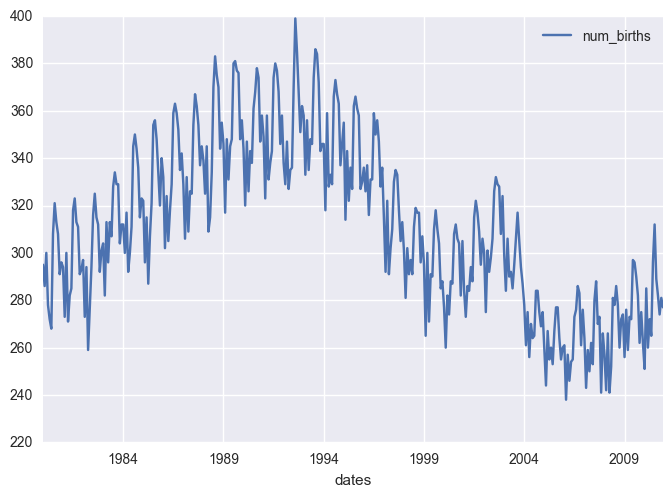

In [15]:
birth_series.plot();

8) Plot the data for 2006-2010, is the seasonal pattern more apparent? 

In [16]:
seasonal = pd.Series(birth_df['num_births']["2006-01-01":]).to_frame()
seasonal

,num_births
dates,
2006-01-31,261
2006-02-28,238
2006-03-31,257
2006-04-30,246
2006-05-31,254
2006-06-30,255
2006-07-31,273
2006-08-31,276
2006-09-30,286


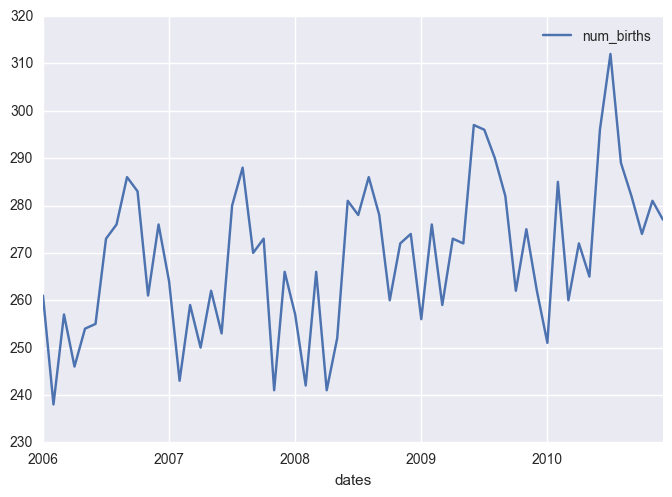

In [17]:
seasonal.plot();

yes, the seasonal pattern more apparent.  The graph shows spikes during the seasons.

9) Use `df.resample('Q-NOV')` to get quarterly means that follow the seasons of the year (spring, summer, fall, winter). 

In [18]:
birth_df.resample?

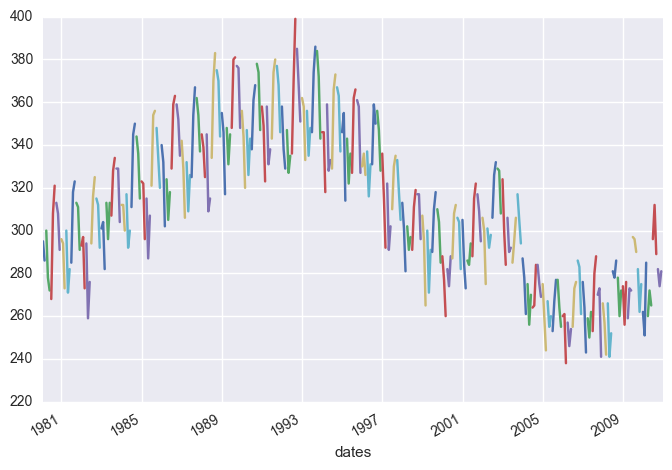

In [19]:
resample = birth_df.resample('Q-NOV')['num_births'].plot()  # quarterly, defined by November


In [20]:
# resample_series = pd.Series(resample)
# resample_series

10) Superimpose the yearly averages and the seasonal averages onto the monthly
data.

![image](images/birthdata_with_averages.png)

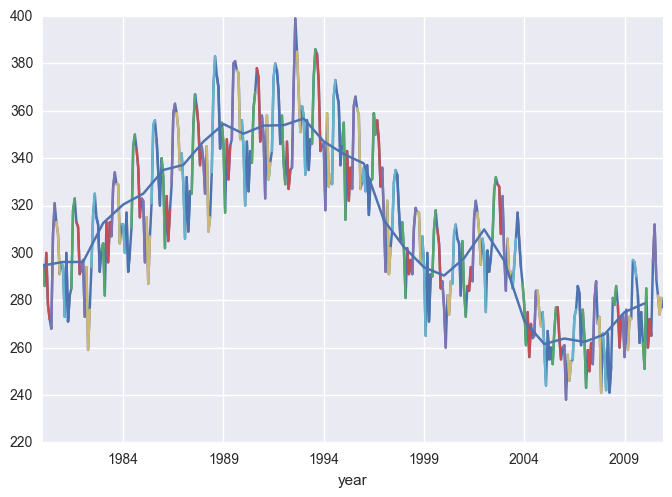

In [21]:
birth_df['num_births'].plot(label='Monthly')

resample = birth_df.resample('Q-NOV')['num_births'].plot(label='Quarterly')  # quarterly, defined by November
by_year = birth_df.groupby("year").mean()['num_births'].to_frame()

# have to create column called year and create same date range
by_year['year'] = pd.date_range('January 1980', periods=len(by_year), freq='A')

by_year.set_index('year')['num_births'].plot(label='Annual')

# by_year.to_frame()
# plt.legend(loc=2)

In [27]:
# birth_df['num_births'].plot(label='Monthly');
# by_year = by_year.groupby("year").mean()['num_births'].to_frame();
# by_year['year'] = pd.date_range('January 1980', periods=len(by_year), freq='A');
# by_year.set_index('year')['num_births'].plot(label='Annual');
# birth_df.resample('Q-NOV')['num_births'].mean().plot(color="r", label='Quarterly');
# plt.legend(loc=1);